# **Day 1**
### Intro to Python libraries (Data Viz and EDA)

https://www.projectpro.io/article/top-5-libraries-for-data-science-in-python/196

In [1]:
#1: DEPENDENCIES IMPORT

import pandas as pd  # For loading data into a tabular format
import matplotlib.pyplot as plt  # For graph plotting
import seaborn as sns  # For graph plotting
from sklearn.preprocessing import LabelEncoder  # For label encoding in EDA
from sklearn.utils import resample   # For data sampling in EDA
from sklearn.utils import shuffle   # For shuffling the data

In [2]:
#2: CSV IMPORT and PREVIEW

# Print the data
housing = pd.read_csv('./housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


https://developers.google.com/machine-learning/crash-course/california-housing-data-description

## Data Visualization

#### **Scatterplot (with Pyplot and Seaborn)**

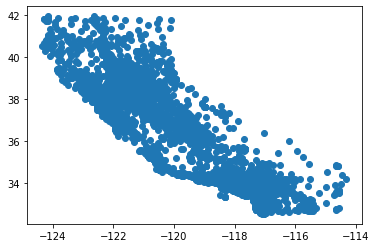

In [3]:
#3: DATA VIZ DEMO: SCATTERPLOT (PYPLOT)

# Create scatterplot with pyplot
scatter_plt = plt.scatter(x=housing['longitude'], y=housing['latitude'])
plt.show()

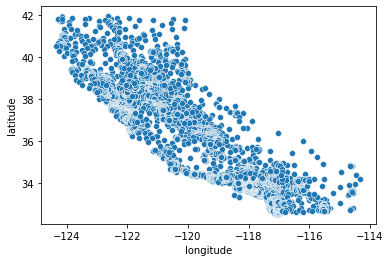

In [4]:
#4: DATA VIZ DEMO: SCATTERPLOT (SEABORN)

# Create scatterplot with seaborn
# Usually, seaborn is for creating plot, but plt (matplotlib) is usually for setting up visuals,
# and texts. Seaborn's graph is generally prettier
scatter_sns_1 = sns.scatterplot(x=housing['longitude'], y=housing['latitude'])
plt.show()

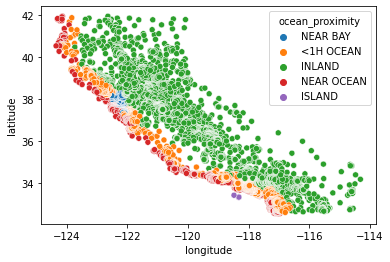

In [5]:
#5: DATA VIZ DEMO: SCATTERPLOT with HUE (SEABORN)

# Create scatterplot with seaborn + add HUE parameter
# What is 'ocean_proximity'? Hue in the matter of design colors? In the table, the ocean_proximity
# is like a simple string, so how it can show map colors?
scatter_sns_2 = sns.scatterplot(x='longitude', y='latitude', data=housing, hue='ocean_proximity')

plt.show()

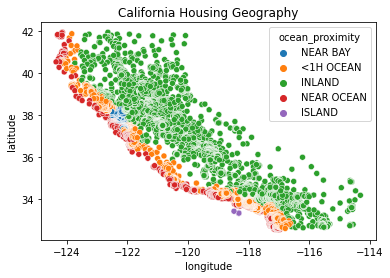

In [6]:
#6: DATA VIZ DEMO: SCATTERPLOT with HUE + TITLE (SEABORN)

# Add title above the scatterplot
scatter_sns_2 = sns.scatterplot(x='longitude', y='latitude', data=housing, hue='ocean_proximity')
plt.title('California Housing Geography')
plt.show()

#### **Boxplot with Seaborn**

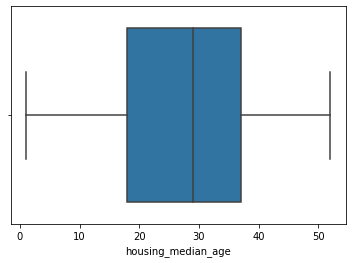

In [7]:
# Create boxplot with seaborn
boxplot_sns = sns.boxplot(x='housing_median_age', data=housing)
plt.show()

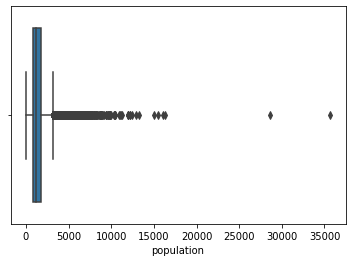

In [8]:
# Create boxplot with seaborn
boxplot_sns = sns.boxplot(x='population', data=housing)
plt.show()

#### **Barplot with Seaborn and Pyplot**

In [9]:
# PROCESS DATA => ocean_proximity types

# Calculate the number of data per its ocean_proximity 
data_barplot = housing['ocean_proximity'].value_counts()

# Print data
data_barplot

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

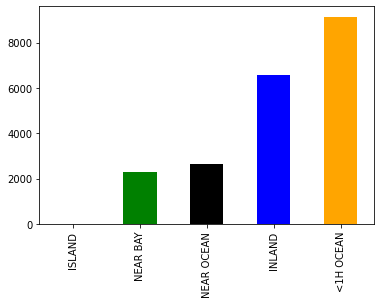

In [10]:
# BARPLOT WITH PYPLOT

data_barplot.sort_values().plot(kind="bar", color=['red', 'green','black','blue','orange'])
plt.show()

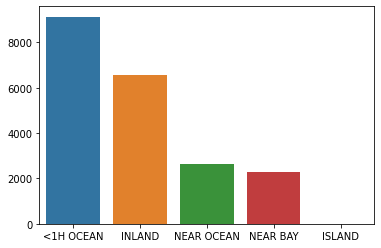

In [11]:
# BARPLOT WITH SEABORN

barplot = sns.barplot(x = data_barplot.index, y = data_barplot.values)

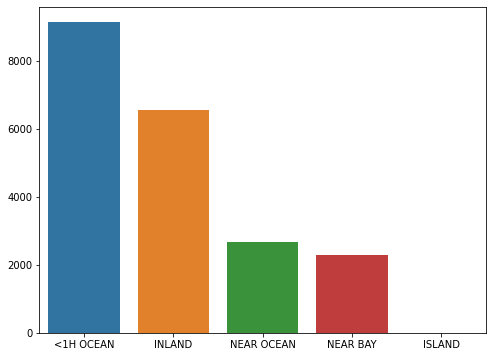

In [12]:
# BARPLOT WITH SEABORN, AND UI SETUP WITH PYPLOT

plt.figure(figsize=(8, 6))
barplot = sns.barplot(y=data_barplot.values, x=data_barplot.index)
plt.show()        

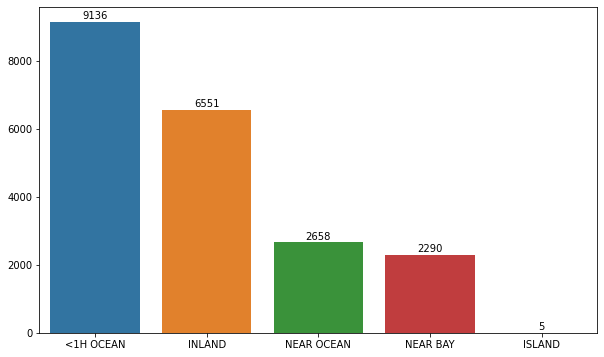

In [13]:
# BARPLOT WITH BAR'S ANNOTATION (PYPLOT)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(y=data_barplot.values, x=data_barplot.index)

for i in range(len(data_barplot)):
    #Parameters: ([index], [Y-axis offset (+100 pt)], [value], [alignment])
    plt.text(i, (data_barplot.values[i] + 100), data_barplot.values[i], horizontalalignment='center')

plt.show()

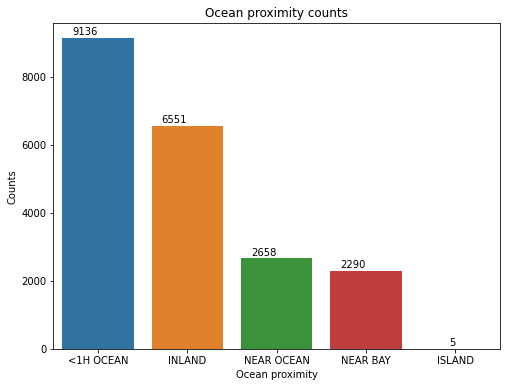

In [14]:
# BARPLOT WITH TITLE AND LABELS (PYPLOT)

# Graph figure
plt.figure(figsize=(8, 6))

#Create graph instance
barplot = sns.barplot(y=data_barplot.values, x=data_barplot.index)

#Create text on top of each bar
for i in range(len(data_barplot)):
    plt.text(i, (data_barplot.values[i] + 100), data_barplot.values[i], horizontalalignment='right')

#Create title, Y-axis label, or X-label
plt.title('Ocean proximity counts')
plt.ylabel('Counts')             
plt.xlabel('Ocean proximity')

#Seaborn can also set titles, but usually its plt?
#barplot.set(xlabel='seaborn_count', ylabel='ocean_proximity_seaborn')

plt.show()

## Preprocessing Data for EDA and EDA

**Goals:**
1. Classification => ocean proximity
2. Regression => median housing value

**Flow:**
1. ?Downsampling
2. Find null values and fill it with (Number => mean / median) & (Other => mod type / other new type), 
3. Find duplicates and remove them
1. ?Downsampling 
4. Check for correlation (for Regression Task)
5. Transform latest DataFrame into some 'features', so that they can be used easily as predictive model (ML)
6. Encode the DataFrame into more readable form (opt.)

**Downsampling Steps on Single Column**:
1. Exclude the outliers (most different data, but with very small count)
2. Transform the column types into dictionary (key, value) = (type_name, count)
3. Get the column's type with minimal count as anchor (key and value)
4. Perform downsampling for reducing and flattening data size into the same as minimal type's count
   - Use `resample()` method as coded below
5. Consider other columns to be downsampled

#### **Downsampling Process**

In [15]:
# Exclude ISLAND in ocean_proximity
# housing[... != 'ISLAND'] => filtering, because != returns T/F from all ocean_proximity => get()
housing_filtered = housing[housing['ocean_proximity']!='ISLAND']

# Keep ocean_proximity and its number of data as dictionary (OBJECT / MAP)
ocean_prox_dict = dict(housing_filtered['ocean_proximity'].value_counts())

ocean_prox_dict

{'<1H OCEAN': 9136, 'INLAND': 6551, 'NEAR OCEAN': 2658, 'NEAR BAY': 2290}

In [16]:
##RETRIEVING MIN VALUE AND ITS KEY OF OCEAN_PROX_DICT
#Get key from the min value of ocean_prox_dict
def get_min_key(ocean_prox_dict, min_value):
    min_key = ''
    for key,value in ocean_prox_dict.items():
        if value == min_value:
            min_key = key
    return min_key

# Get the ocean_proximity with the lowest number of data
min_value = min(ocean_prox_dict.values())
min_key = get_min_key(ocean_prox_dict, min_value)

min_key, min_value

# min_key = [k for k, v in ocean_prox_dict.items() if v == min_value]
# min_key

('NEAR BAY', 2290)

In [17]:
# Perform downsampling to neutralize the number of data for each label
# Downsampling is a process for reducing 'redundant' datas
# Downsampling is done by reducing EACH COLUMN COUNT (housing_filtered) into their sibling with MINIMUM COUNT (NEAR_BAY = 2290)
# So that all 'ocean_proximity' type (ex: IN LAND, etc.)'s count will be => 2290
# Downsampling enables you to create even smaller models since the machine learning algorithm doesn't require as many training data points

def downsampling(df, target_column, min_key, min_value):
    #Assign a DataFrame with 'ocean_proximity' type with min counts
    #This DataFrame will be added with other 'ocean_proximity' types after they has been resampled (downsampling)
    df_process = df[df[target_column] == min_key]
    
    print(df[target_column])
    for target in df[target_column].unique():
        #If target is minimum key (NEAR_BAY), no downsample will be executed
        if target != min_key:
            #Will be filled with 2290 (n_samples = min_value) datas with each 'ocean_proximity' types
            class_downsample = resample(df[df[target_column] == target], replace = False, n_samples = min_value, random_state = 24)
            
            #Concat the current DataFrame (df_process) with the new class_downsample (adds 2290 datas)
            df_process = pd.concat([df_process, class_downsample])
    
    #Reset index and shuffle the finalized DataFrame(df_process)
    return shuffle(df_process).reset_index(drop=True)

housing_downsampled = downsampling(housing_filtered, 'ocean_proximity', min_key, min_value)

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20635, dtype: object


#### **Null Values Check and Fill**

In [18]:
# Check for null values, and fill the missing datas
# Missing datas is usually filled with *mean* or *median*
    # Many outliers => median (so that missing value won't be so big), otherwise => mean
    # Outliers is big or small data that far different than most datas, but with small count (1 2 3 10000 (outlier))
housing_downsampled.info()

#In the output below, notice that 'total_bedrooms' GOT 9080 non-null counts, compared to other (9160), meaning there are some nulls to be FILLED

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9160 entries, 0 to 9159
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           9160 non-null   float64
 1   latitude            9160 non-null   float64
 2   housing_median_age  9160 non-null   float64
 3   total_rooms         9160 non-null   float64
 4   total_bedrooms      9080 non-null   float64
 5   population          9160 non-null   float64
 6   households          9160 non-null   float64
 7   median_income       9160 non-null   float64
 8   median_house_value  9160 non-null   float64
 9   ocean_proximity     9160 non-null   object 
dtypes: float64(9), object(1)
memory usage: 715.8+ KB


In [19]:
# Calculate total_bedrooms mean
housing_downsampled['total_bedrooms'].mean()

529.3253303964758

In [20]:
# Calculate total_bedrooms median
housing_downsampled['total_bedrooms'].median()

435.0

Note: To fill empty values in numerical attributes, mean and median are widely used. When the attribute has many outliers, median is recommended.

In [21]:
# Fill null values on new duplicate variable (so that the source variable stays clean)
housing_fillNaN = housing_downsampled.copy()

#Fill null values in 'total_bedrooms' column with the column's median via .fillna() method 
housing_fillNaN['total_bedrooms'] = housing_fillNaN['total_bedrooms'].fillna(housing_fillNaN['total_bedrooms'].median())

In [22]:
# Print dataframe info (AGAIN) AFTER .fillna() to check non-null count and dtype 
housing_fillNaN.info()

#In the output below, NOTICE THAT the non-null count of 'total_bedrooms' is now: 9160

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9160 entries, 0 to 9159
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           9160 non-null   float64
 1   latitude            9160 non-null   float64
 2   housing_median_age  9160 non-null   float64
 3   total_rooms         9160 non-null   float64
 4   total_bedrooms      9160 non-null   float64
 5   population          9160 non-null   float64
 6   households          9160 non-null   float64
 7   median_income       9160 non-null   float64
 8   median_house_value  9160 non-null   float64
 9   ocean_proximity     9160 non-null   object 
dtypes: float64(9), object(1)
memory usage: 715.8+ KB


#### **Duplicates Check and Removal**

In [23]:
# Check for duplicates
# Search the copy var with [...] where .duplicated() will return T/F for each value
# The code below will return one or more row if there are duplicates
# ML Models usually needs no duplicate

housing_fillNaN[housing_fillNaN.duplicated()]

# Coincidentally, no duplicates or .duplicated() method checks more than one column

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


#### **Correlation Task (Regression Task)**

In [24]:
# Label ocean_proximity to numerical representation
le = LabelEncoder()
housing_fillNaN['ocean_proximity_num'] = le.fit_transform(housing_fillNaN['ocean_proximity'])

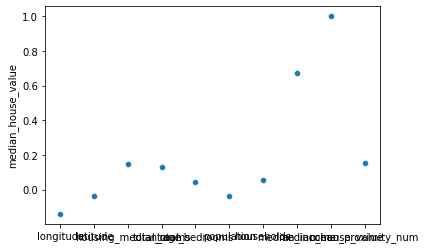

In [25]:
# Check for median_house_value correlation (Regression Task)
# Regression => 'median_house_value' as anchor
    # Check for a colleration towards 'median_house_value'
    # The anchor (median_house_value) is obviously *1.0*, because it's tightly correlated

corrDatas = housing_fillNaN.corr()['median_house_value']
corrPlot = sns.scatterplot(data = corrDatas)

In [26]:
# Feature engineering (on '...households' and '...bedrooms'), then check .corr() again.
housing_fillNaN['population_per_households'] = round(housing_fillNaN['population'] / housing_fillNaN['households'])

In [27]:
housing_fillNaN.corr()['median_house_value']

longitude                   -0.140086
latitude                    -0.033830
housing_median_age           0.149784
total_rooms                  0.129458
total_bedrooms               0.042287
population                  -0.037643
households                   0.055592
median_income                0.674562
median_house_value           1.000000
ocean_proximity_num          0.153400
population_per_households   -0.017332
Name: median_house_value, dtype: float64

In [28]:
housing_fillNaN['population_per_bedrooms'] = round(housing_fillNaN['population'] / housing_fillNaN['total_bedrooms'])

In [29]:
# Check for correlation
housing_fillNaN.corr()['median_house_value']

longitude                   -0.140086
latitude                    -0.033830
housing_median_age           0.149784
total_rooms                  0.129458
total_bedrooms               0.042287
population                  -0.037643
households                   0.055592
median_income                0.674562
median_house_value           1.000000
ocean_proximity_num          0.153400
population_per_households   -0.017332
population_per_bedrooms     -0.014187
Name: median_house_value, dtype: float64

# **Day 2**

### Preprocessing Data for Modelling

In [30]:
from sklearn.model_selection import train_test_split   # To split train val test set
from sklearn.pipeline import Pipeline      # To create pipeline for data transformation
from sklearn.impute import SimpleImputer     # To impute missing values
from sklearn.preprocessing import StandardScaler     # To standardize the data
from sklearn.metrics import accuracy_score    # To calculate the accuracy

In [31]:
# Classification task
columns = housing_fillNaN.drop('ocean_proximity', axis=1).columns
classification_target = "ocean_proximity_num"

num_attributes = housing_fillNaN.drop(['ocean_proximity', 'ocean_proximity_num'], axis=1).columns

In [32]:
columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_num',
       'population_per_households', 'population_per_bedrooms'],
      dtype='object')

In [33]:
# Split data into train. valid, and test set
X_data, y_data = housing_fillNaN[num_attributes], housing_fillNaN[classification_target]
X, X_test, y, y_test = train_test_split(X_data, y_data, test_size = 0.3, stratify=y_data, random_state=24)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=24)

In [34]:
# Create pipeline to transform numerical attributes
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [35]:
# Preprocess the data
def preprocess_data_classification(df, num_attributes, num_pipeline, train=True):
    if train:
        num_df = num_pipeline.fit_transform(df[num_attributes])
        preprocess_df = pd.DataFrame(num_df, columns=num_attributes)
    else:
        num_df = num_pipeline.transform(df[num_attributes])
        preprocess_df = pd.DataFrame(num_df, columns=num_attributes)
    return preprocess_df

X_train_classification = preprocess_data_classification(X_train, num_attributes, num_pipeline, train=True)
X_valid_classification = preprocess_data_classification(X_valid, num_attributes, num_pipeline, train=False)
X_test_classification = preprocess_data_classification(X_test, num_attributes, num_pipeline, train=False)

### Machine Learning and Evaluation Part 1 (Classification)

In [36]:
# Train with KNN
from sklearn.neighbors import KNeighborsClassifier

n = 5
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train_classification, y_train)

prediction = knn.predict(X_valid_classification)
print(n, accuracy_score(prediction, y_valid))

5 0.7068607068607069


In [37]:
# Hyperparameter tuning KNN
from sklearn.neighbors import KNeighborsClassifier

for n in range(4, 8):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_classification, y_train)

    prediction = knn.predict(X_valid_classification)
    print(n, accuracy_score(prediction, y_valid))

4 0.7032224532224532
5 0.7068607068607069
6 0.7188149688149689
7 0.7125779625779626


In [38]:
# Train with Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=150)
lr.fit(X_train_classification, y_train)

prediction = lr.predict(X_valid_classification)
print(accuracy_score(prediction, y_valid))

0.7837837837837838


In [39]:
# Train with Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=24)
dt.fit(X_train_classification, y_train)

prediction = dt.predict(X_valid_classification)
print(accuracy_score(prediction, y_valid))

0.9443866943866944


In [40]:
# Hyperparameter with Decision Tree
max_depth = range(1, 15)
max_leaf_nodes = range(10, 100, 5)
for depth in max_depth:
    for leaf in max_leaf_nodes:
        dt = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=leaf, random_state=24)
        dt.fit(X_train_classification, y_train)

        prediction = dt.predict(X_valid_classification)
        print("Depth: {}, Leaf: {}, Acc: {}".format(depth, leaf, accuracy_score(prediction, y_valid)))

Depth: 1, Leaf: 10, Acc: 0.48544698544698545
Depth: 1, Leaf: 15, Acc: 0.48544698544698545
Depth: 1, Leaf: 20, Acc: 0.48544698544698545
Depth: 1, Leaf: 25, Acc: 0.48544698544698545
Depth: 1, Leaf: 30, Acc: 0.48544698544698545
Depth: 1, Leaf: 35, Acc: 0.48544698544698545
Depth: 1, Leaf: 40, Acc: 0.48544698544698545
Depth: 1, Leaf: 45, Acc: 0.48544698544698545
Depth: 1, Leaf: 50, Acc: 0.48544698544698545
Depth: 1, Leaf: 55, Acc: 0.48544698544698545
Depth: 1, Leaf: 60, Acc: 0.48544698544698545
Depth: 1, Leaf: 65, Acc: 0.48544698544698545
Depth: 1, Leaf: 70, Acc: 0.48544698544698545
Depth: 1, Leaf: 75, Acc: 0.48544698544698545
Depth: 1, Leaf: 80, Acc: 0.48544698544698545
Depth: 1, Leaf: 85, Acc: 0.48544698544698545
Depth: 1, Leaf: 90, Acc: 0.48544698544698545
Depth: 1, Leaf: 95, Acc: 0.48544698544698545
Depth: 2, Leaf: 10, Acc: 0.6231808731808732
Depth: 2, Leaf: 15, Acc: 0.6231808731808732
Depth: 2, Leaf: 20, Acc: 0.6231808731808732
Depth: 2, Leaf: 25, Acc: 0.6231808731808732
Depth: 2, Leaf

In [41]:
dt = DecisionTreeClassifier(max_depth=14, max_leaf_nodes=80, random_state=24)
dt.fit(X_train_classification, y_train)
prediction = dt.predict(X_test_classification)
accuracy_score(prediction, y_test)
# print("Depth: {}, Leaf: {}, Acc: {}".format(depth, leaf, accuracy_score(prediction, y_valid)))

0.9457787481804949

In [42]:
dt = DecisionTreeClassifier(random_state=24)
dt.fit(X_train_classification, y_train)
prediction = dt.predict(X_test_classification)
accuracy_score(prediction, y_test)
# print("Depth: {}, Leaf: {}, Acc: {}".format(depth, leaf, accuracy_score(prediction, y_valid)))

0.9508733624454149

In [43]:
# Train with Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=24)
rf.fit(X_train_classification, y_train)

prediction = rf.predict(X_valid_classification)
print(accuracy_score(prediction, y_valid))

0.9313929313929314


In [44]:
# Hyperparameter tuning with Random Forest
max_depth = range(1, 15)
max_leaf_nodes = range(10, 100, 5)
for depth in max_depth:
    for leaf in max_leaf_nodes:
        rf = RandomForestClassifier(max_depth=depth, max_leaf_nodes=leaf, random_state=24)
        rf.fit(X_train_classification, y_train)

        prediction = rf.predict(X_valid_classification)
        print("Depth: {}, Leaf: {}, Acc: {}".format(depth, leaf, accuracy_score(prediction, y_valid)))

Depth: 1, Leaf: 10, Acc: 0.6413721413721414
Depth: 1, Leaf: 15, Acc: 0.6413721413721414
Depth: 1, Leaf: 20, Acc: 0.6413721413721414
Depth: 1, Leaf: 25, Acc: 0.6413721413721414
Depth: 1, Leaf: 30, Acc: 0.6413721413721414
Depth: 1, Leaf: 35, Acc: 0.6413721413721414
Depth: 1, Leaf: 40, Acc: 0.6413721413721414
Depth: 1, Leaf: 45, Acc: 0.6413721413721414
Depth: 1, Leaf: 50, Acc: 0.6413721413721414
Depth: 1, Leaf: 55, Acc: 0.6413721413721414
Depth: 1, Leaf: 60, Acc: 0.6413721413721414
Depth: 1, Leaf: 65, Acc: 0.6413721413721414
Depth: 1, Leaf: 70, Acc: 0.6413721413721414
Depth: 1, Leaf: 75, Acc: 0.6413721413721414
Depth: 1, Leaf: 80, Acc: 0.6413721413721414
Depth: 1, Leaf: 85, Acc: 0.6413721413721414
Depth: 1, Leaf: 90, Acc: 0.6413721413721414
Depth: 1, Leaf: 95, Acc: 0.6413721413721414
Depth: 2, Leaf: 10, Acc: 0.696985446985447
Depth: 2, Leaf: 15, Acc: 0.696985446985447
Depth: 2, Leaf: 20, Acc: 0.696985446985447
Depth: 2, Leaf: 25, Acc: 0.696985446985447
Depth: 2, Leaf: 30, Acc: 0.696985446

In [45]:
rf = RandomForestClassifier(max_depth=14, max_leaf_nodes=95, random_state=24)
rf.fit(X_train_classification, y_train)
prediction = rf.predict(X_test_classification)
accuracy_score(prediction, y_test)
# print("Depth: {}, Leaf: {}, Acc: {}".format(depth, leaf, accuracy_score(prediction, y_valid)))

0.9126637554585153

### Machine Learning and Evaluation Part 2

In [46]:
housing_fillNaN

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_num,population_per_households,population_per_bedrooms
0,-118.42,34.03,45.0,1262.0,223.0,637.0,221.0,5.0866,427300.0,<1H OCEAN,0,3.0,3.0
1,-120.84,37.07,24.0,1520.0,335.0,882.0,306.0,2.2019,100000.0,INLAND,1,3.0,3.0
2,-117.84,33.77,14.0,4412.0,952.0,1656.0,874.0,4.3292,206500.0,<1H OCEAN,0,2.0,2.0
3,-121.95,37.74,19.0,1127.0,170.0,518.0,167.0,6.3325,250000.0,<1H OCEAN,0,3.0,3.0
4,-121.91,36.98,16.0,1957.0,408.0,865.0,369.0,2.6875,233300.0,NEAR OCEAN,3,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9155,-120.45,34.64,40.0,1051.0,235.0,574.0,201.0,2.0865,111500.0,NEAR OCEAN,3,3.0,2.0
9156,-122.23,38.12,49.0,2715.0,435.0,1006.0,429.0,4.2308,145800.0,NEAR BAY,2,2.0,2.0
9157,-117.85,33.89,22.0,4020.0,655.0,1486.0,635.0,5.9639,262300.0,<1H OCEAN,0,2.0,2.0
9158,-121.93,36.63,33.0,1740.0,342.0,638.0,329.0,3.1912,319800.0,NEAR OCEAN,3,2.0,2.0


In [47]:
from sklearn.preprocessing import OneHotEncoder     # To represent data in one hot encoding representation
from sklearn.compose import ColumnTransformer       # To combine numerical pipeline with one hot encoder
from sklearn.metrics import mean_absolute_error as mae     # To calculate the mean absolute error

In [48]:
# Regression task
regression_target = "median_house_value"

num_attributes = housing_fillNaN.drop(['median_house_value', 'ocean_proximity', 'ocean_proximity_num'], axis=1).columns
cat_attributes = ["ocean_proximity"]

In [49]:
# Split data into train. valid, and test set
X_data, y_data = housing_fillNaN[num_attributes.tolist()+cat_attributes], housing_fillNaN[regression_target]
X, X_test, y, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state=24)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state=24)

In [50]:
# Represent data in one hot encoding representation
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit_transform(housing_fillNaN[['ocean_proximity']]).toarray()
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]

In [51]:
# Create pipeline for regression task
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attributes),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attributes)
    ])

In [52]:
# Preprocess the data
def preprocess_data_regression(df, num_attributes, cat_attributes, full_pipeline, train=True):
    cat_attributes_ohe = ['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN']
    columns = num_attributes.tolist() + cat_attributes_ohe
    
    if train:
        num_df = full_pipeline.fit_transform(df)
        preprocess_df = pd.DataFrame(num_df, columns=columns)
    else:
        num_df = full_pipeline.transform(df)
        preprocess_df = pd.DataFrame(num_df, columns=columns)
    
    return preprocess_df

X_train_regression = preprocess_data_regression(X_train, num_attributes, cat_attributes, full_pipeline, train=True)
X_valid_regression = preprocess_data_regression(X_valid, num_attributes, cat_attributes, full_pipeline, train=False)
X_test_regression = preprocess_data_regression(X_test, num_attributes, cat_attributes, full_pipeline, train=False)

In [53]:
from sklearn.neighbors import KNeighborsRegressor

n = 5
knn = KNeighborsRegressor(n_neighbors=n)
knn.fit(X_train_regression, y_train)

prediction = knn.predict(X_valid_regression)
print("n: {}, MAE: {}".format(n, mae(prediction, y_valid)))

n: 5, MAE: 47856.60997920998


In [54]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_regression, y_train)

prediction = lr.predict(X_valid_regression)
print("MAE: {}".format(mae(prediction, y_valid)))

MAE: 54164.6658004158


In [55]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=24)
dt.fit(X_train_regression, y_train)

prediction = dt.predict(X_valid_regression)
print("MAE: {}".format(mae(prediction, y_valid)))

MAE: 50381.75987525988


In [56]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=24)
rf.fit(X_train_regression, y_train)

prediction = rf.predict(X_valid_regression)
print("MAE: {}".format(mae(prediction, y_valid)))

MAE: 37448.75943347194


In [57]:
prediction = rf.predict(X_test_regression)
print("MAE: {}".format(mae(prediction, y_test)))

MAE: 37588.06401018923
